The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [ ]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import string

# Start coding here!

In [ ]:
df=pd.read_csv("data/nobel.csv")

In [ ]:
print(df.columns)
print(df['sex'].mode())
top_gender=df['sex'].mode().values[0]
print(top_gender)
top_country=df['birth_country'].mode().values[0]
print(top_country)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
0    Male
Name: sex, dtype: object
Male
United States of America


In [ ]:
#Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
df['american']=df['birth_country']=='United States of America'
prop_usa_winners=df.groupby('decade', as_index=False)['american'].mean()
print(prop_usa_winners)

    decade  american
0     1900  0.017544
1     1910  0.075000
2     1920  0.074074
3     1930  0.250000
4     1940  0.302326
5     1950  0.291667
6     1960  0.265823
7     1970  0.317308
8     1980  0.319588
9     1990  0.403846
10    2000  0.422764
11    2010  0.314050
12    2020  0.360000


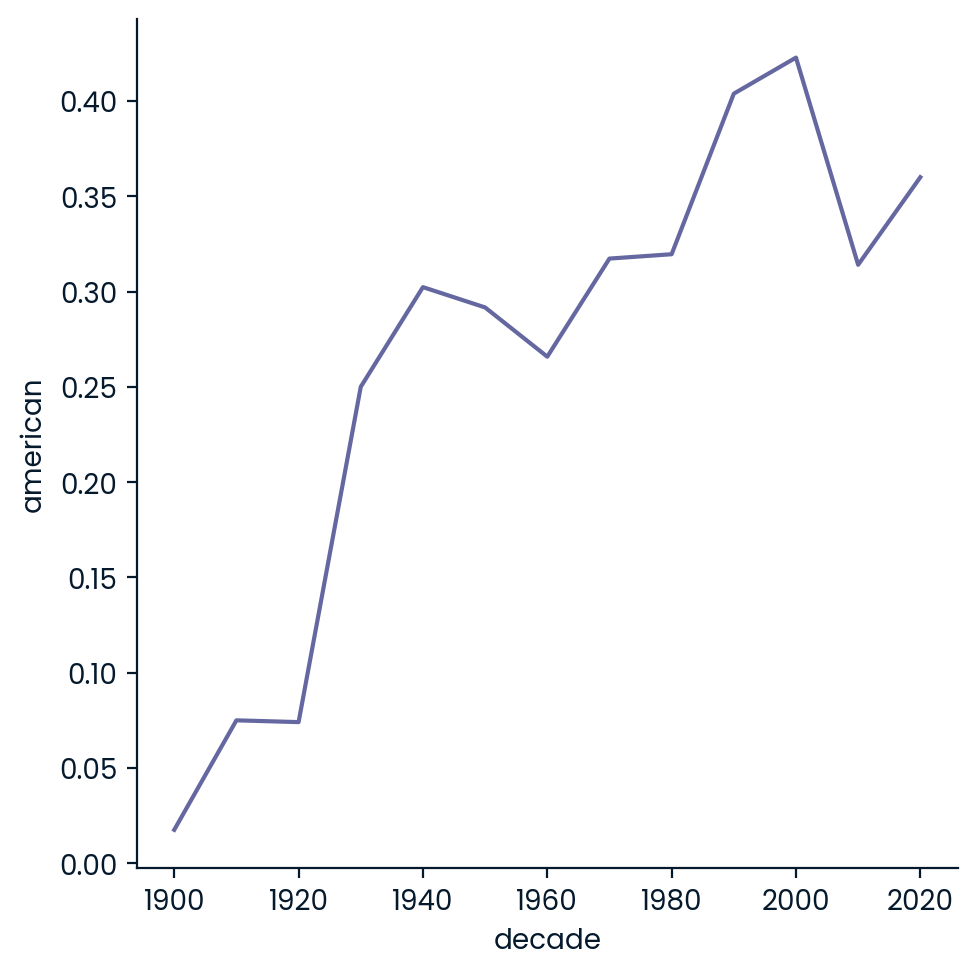

In [ ]:
#Plotting USA born Winners
ax=sns.relplot(x='decade', y='american', data=df, kind='line', ci=None)

In [ ]:
max_decade_usa=prop_usa_winners.sort_values('american',ascending=False).iloc[0,0]


In [ ]:
df['sex'].value_counts()

Male      905
Female     65
Name: sex, dtype: int64

In [ ]:
#Which decade and Nobel Prize category combination had the highest proportion of female laureates?

df['Female']=(df['sex']=='Female').astype(int)
df_woman_prop=df.groupby(['decade', 'category'], as_index=False)['Female'].mean()
max_female_df=df_woman_prop[df_woman_prop['Female']==df_woman_prop['Female'].max()][['decade','category', 'Female']]

In [ ]:
max_female_df

,decade,category,Female
68,2020,Literature,0.5


In [ ]:

#Creating a dictionary
max_female_dict={max_female_df['decade'].values[0]:max_female_df['category'].values[0]}

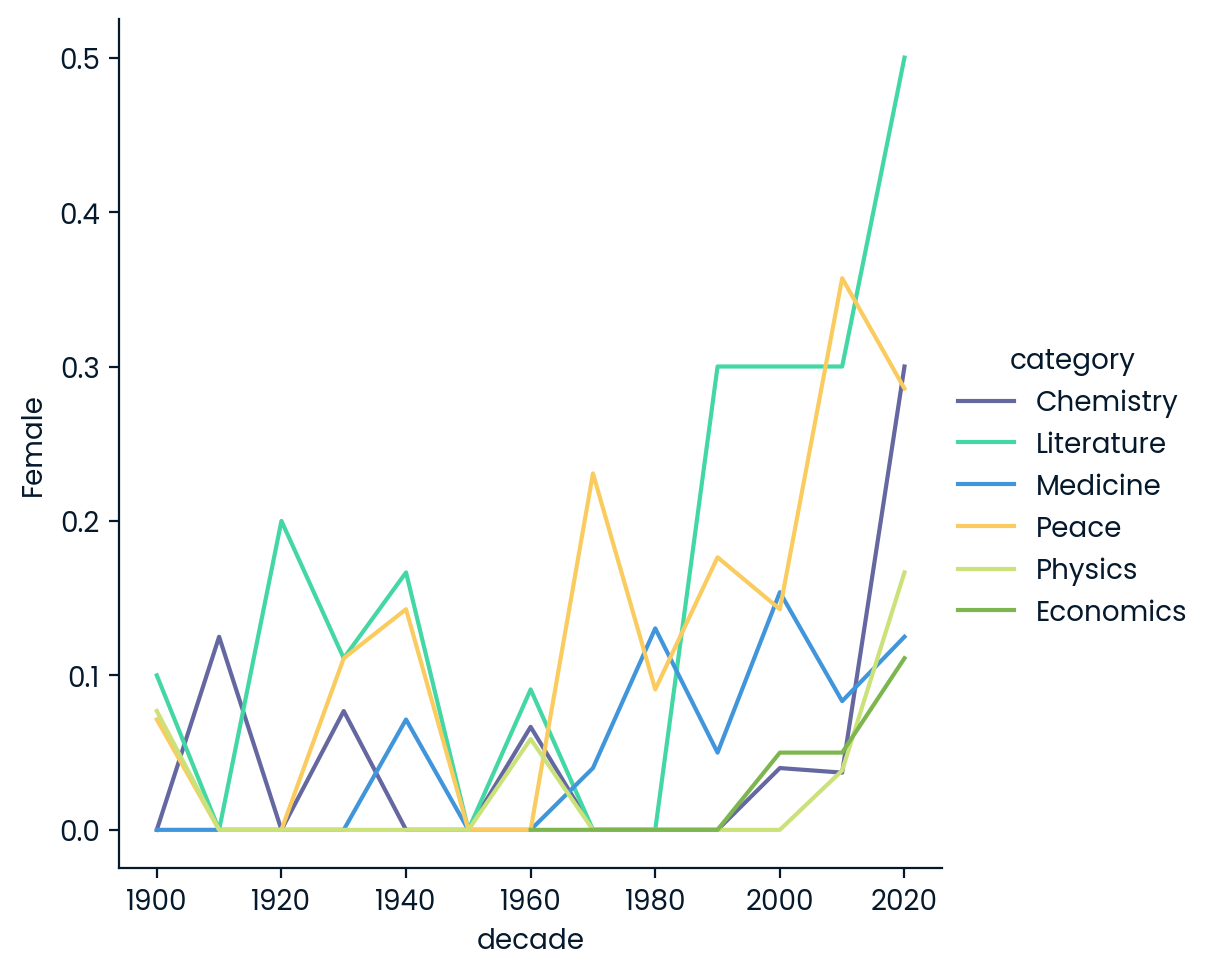

In [ ]:
#Plotting female winners with % winners on the y-axis
ax2=sns.relplot(x='decade', y='Female', hue='category', data=df_woman_prop, kind='line')

In [ ]:
print(df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade', 'american', 'Female'],
      dtype='object')


In [ ]:
#Who was the first woman to receive a Nobel Prize, and in what category?
nobel_women=df[df['Female']==1]
min_year_women=nobel_women[nobel_women['year']==nobel_women['year'].min()]
print(min_year_women)
first_woman_name=min_year_women['full_name'].values[0]
print(first_woman_name)
first_woman_category=min_year_women['category'].values[0]

    year category                            prize  ... decade american  Female
19  1903  Physics  The Nobel Prize in Physics 1903  ...   1900    False       1

[1 rows x 21 columns]
Marie Curie, née Sklodowska


In [ ]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade', 'american', 'Female'],
      dtype='object')

In [ ]:
#Which individuals or organizations have won more than one Nobel Prize throughout the years?
repeat=df['full_name'].value_counts()
repeat_list=list(repeat[repeat>=2].index)

In [ ]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']